# Breast Cancer Diagnostic
## The goal of this project is to build a model able to predict the diagnosis of breast cancer tissues as malignant or benign. 

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

- Class distribution: 357 benign, 212 malignant. More info about this dataset here

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (roc_auc_score, confusion_matrix, recall_score, precision_score, RocCurveDisplay, 
                             accuracy_score, plot_confusion_matrix, auc, classification_report)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import plotly.express as px

In [2]:
# import data
X= pd.read_csv("X.csv")
y=pd.read_csv("y.csv")
y=y.values.ravel()

In [3]:
xMean=X.iloc[:,0:10].copy().drop(["perimeter_mean", "area_mean", "concave points_mean", "compactness_mean"], axis=1)
random=42

In [4]:
X_train, X_test, y_train, y_test = train_test_split(xMean, y, test_size=0.30, random_state=random)

## Logistic Regression

In [5]:
lr= LogisticRegression(random_state=random, max_iter=5000)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Accuracy:  0.8894472361809045
Test Accuracy:  0.9239766081871345
Training ROC_AUC:  0.8752594269696234
Test ROC_AUC:  0.9100529100529102


## Tuning

In [6]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=1000, max_iter=5000, random_state=42, solver='newton-cg')


0.9763206349206348

In [7]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[900, 1000,2000,3000,3100, 3500],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=3000, max_iter=5000, random_state=42, solver='liblinear')


0.9766915343915344

In [8]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
14,0.006700,0.001574,0.005100,0.001106,3100,5000,l2,liblinear,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.965333,0.981333,0.946667,0.968000,1.0,0.940000,0.997222,0.976692,0.027850,1
11,0.005801,0.001246,0.004064,0.000772,3000,5000,l2,liblinear,"{'C': 3000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.968000,0.981333,0.946667,0.968000,1.0,0.940000,0.997222,0.976692,0.027748,1
8,0.004235,0.000843,0.003033,0.000707,2000,5000,l2,liblinear,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.965333,0.981333,0.949333,0.965333,1.0,0.937143,0.997222,0.976689,0.027555,3
6,0.048885,0.008985,0.003534,0.000957,2000,5000,l2,newton-cg,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.965333,0.981333,0.949333,0.965333,1.0,0.937143,0.997222,0.976689,0.027555,3
7,0.045132,0.011214,0.003467,0.000806,2000,5000,l2,lbfgs,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.965333,0.981333,0.949333,0.965333,1.0,0.937143,0.997222,0.976689,0.027555,3
12,0.059638,0.013311,0.003599,0.000842,3100,5000,l2,newton-cg,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.965333,0.981333,0.946667,0.968000,1.0,0.940000,0.997222,0.976523,0.028228,6
13,0.042903,0.007822,0.003266,0.000626,3100,5000,l2,lbfgs,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.965333,0.981333,0.946667,0.968000,1.0,0.940000,0.997222,0.976523,0.028228,6
9,0.054920,0.008839,0.003835,0.000822,3000,5000,l2,newton-cg,"{'C': 3000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.965333,0.981333,0.946667,0.968000,1.0,0.937143,0.997222,0.976520,0.028273,8
10,0.052305,0.012024,0.003799,0.000832,3000,5000,l2,lbfgs,"{'C': 3000, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.965333,0.981333,0.946667,0.968000,1.0,0.937143,0.997222,0.976520,0.028273,8
15,0.059725,0.009430,0.003773,0.000773,3500,5000,l2,newton-cg,"{'C': 3500, 'max_iter': 5000, 'penalty': 'l2',...",0.994667,...,0.965333,0.981333,0.949333,0.970667,1.0,0.940000,0.997222,0.976341,0.028499,10


In [73]:
lr= LogisticRegression(C=3000, max_iter=5000, random_state=42, solver='liblinear')
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9271356783919598
0.9473684210526315
Training ROC_AUC:  0.917508962022587
Test ROC_AUC:  0.9417989417989417


Accuracy : 94.74
precision : 93.55
recall : 92.06


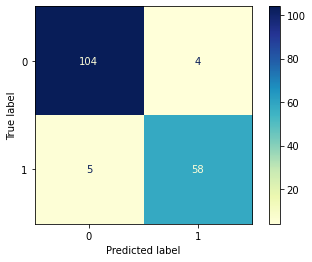

In [10]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [63]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.95      0.96      0.96       108
   Malignant       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



Text(0.5, 0, 'False Positive Rate')

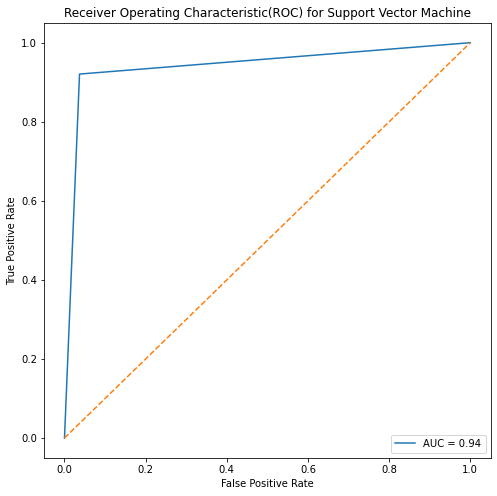

In [11]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

### LASSO Tuning

In [12]:
# define models and parameters
# define grid search
param_grid={'solver': ['liblinear'], 
            'penalty':['l1'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=1000, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')


0.977084126984127

In [13]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
5,0.045627,0.014167,0.005501,0.002334,1000,5000,l1,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l1',...",0.994667,...,0.970667,0.976000,0.954667,0.976000,1.000000,0.948571,0.997222,0.977084,0.027777,1
0,0.031135,0.004586,0.003615,0.001095,100,5000,l1,liblinear,"{'C': 100, 'max_iter': 5000, 'penalty': 'l1', ...",0.994667,...,0.970667,0.976000,0.949333,0.973333,1.000000,0.940000,0.997222,0.976437,0.028273,2
1,0.018749,0.004361,0.004902,0.001903,10,5000,l1,liblinear,"{'C': 10, 'max_iter': 5000, 'penalty': 'l1', '...",0.994667,...,0.973333,0.986667,0.946667,0.944000,1.000000,0.925714,0.997222,0.975851,0.028088,3
2,0.011435,0.002201,0.005200,0.001470,1,5000,l1,liblinear,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l1', ...",0.989333,...,0.962667,0.986667,0.952000,0.944000,1.000000,0.888571,0.997222,0.970985,0.029849,4
3,0.006267,0.000855,0.004434,0.000956,0.1,5000,l1,liblinear,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l1', ...",0.885333,...,0.904000,0.898667,0.906667,0.930667,0.997333,0.744286,0.975000,0.920828,0.053425,5
4,0.008301,0.002452,0.006600,0.001781,0.01,5000,l1,liblinear,"{'C': 0.01, 'max_iter': 5000, 'penalty': 'l1',...",0.416000,...,0.552000,0.424000,0.440000,0.485333,0.418667,0.557143,0.536111,0.496723,0.058525,6


In [14]:
lr= LogisticRegression(penalty='l1', C=1000, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.9396984924623115
Test Score:  0.9473684210526315
Training ROC_AUC:  0.9302444678041024
Test ROC_AUC:  0.9417989417989417


Accuracy : 94.74
precision : 93.55
recall : 92.06


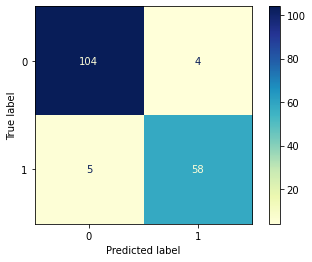

In [15]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [74]:
# last 5 are what was predicted incorrectly
residuals = lr.predict_proba(X_test)[:,1] - y_test
sortIdx=np.argsort(np.abs(residuals))
residDF=X_test.iloc[sortIdx].copy()
residDF["resid"]=residuals[sortIdx]
residDF['y_true']=y_test[sortIdx]
residDF['y_pred']=y_test_pred[sortIdx]
# print(residDF.std())
outliers=residDF.tail(15)
outliers
# outliers.std()
#sns.regplot(x = residuals, y = y_test_pred, scatter = True, color = 'red');

,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,resid,y_true,y_pred
182,15.70,20.31,0.09597,0.06593,0.1618,0.05549,-0.322087,1,1
208,13.11,22.54,0.10020,0.08705,0.1850,0.07310,0.327989,0,0
290,14.41,19.73,0.08757,0.13620,0.1714,0.07192,0.337439,0,0
396,13.51,18.89,0.10590,0.08580,0.1806,0.06079,0.344046,0,0
90,14.62,24.02,0.08974,0.03102,0.1685,0.05866,0.407622,0,0
184,15.28,22.41,0.09057,0.05375,0.1727,0.06317,-0.455125,1,1
528,13.94,13.17,0.12480,0.10100,0.1976,0.06457,0.500719,0,1
10,16.02,23.24,0.08206,0.03299,0.1528,0.05697,-0.503109,1,0
255,13.96,17.05,0.10960,0.09789,0.1908,0.06130,-0.522033,1,0
542,14.74,25.42,0.08275,0.04105,0.1840,0.05680,0.523915,0,1


In [17]:
residDF.groupby('y_true').mean()

,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,resid,y_pred
y_true,,,,,,,,
0,11.957315,18.094167,0.093203,0.045052,0.176876,0.062922,0.069479,0.037037
1,17.539048,22.163333,0.104290,0.168397,0.193902,0.063428,-0.087539,0.920635


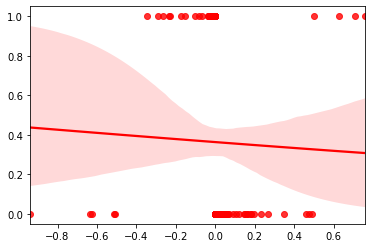

In [18]:
sns.regplot(x = residuals, y = y_test_pred, logistic=True, scatter = True, color = 'red');

## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
#normal data helped this
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9246231155778895
0.9415204678362573
Training ROC_AUC:  0.9141532573246003
Test ROC_AUC:  0.9272486772486772


#### Bernoulli

In [20]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.6256281407035176
0.631578947368421
Training RMSE:  0.6118593460073013
Test RMSE:  0.6069769786668839
Training ROC_AUC:  0.5
Test ROC_AUC:  0.5


### Tuning

In [21]:
param_grid= {'var_smoothing': np.logspace(0,-9, num=100)
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(gnb, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GaussianNB(var_smoothing=6.579332246575683e-05)


0.972611111111111

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.
from https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

In [22]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
46,0.009869,0.003556,0.009070,0.002328,6.57933e-05,{'var_smoothing': 6.579332246575683e-05},0.992000,0.981333,0.992000,0.989333,...,0.962667,1.000000,0.944000,0.922667,1.0,0.928571,0.988889,0.972611,0.029108,1
45,0.008106,0.001967,0.008095,0.002064,8.11131e-05,{'var_smoothing': 8.111308307896872e-05},0.992000,0.981333,0.989333,0.989333,...,0.960000,1.000000,0.946667,0.922667,1.0,0.925714,0.988889,0.972516,0.029118,2
47,0.007684,0.002275,0.007368,0.001780,5.3367e-05,{'var_smoothing': 5.3366992312063123e-05},0.992000,0.984000,0.992000,0.989333,...,0.962667,1.000000,0.946667,0.917333,1.0,0.928571,0.986111,0.972256,0.029175,3
44,0.008932,0.003328,0.009067,0.002265,0.0001,{'var_smoothing': 0.0001},0.992000,0.984000,0.989333,0.992000,...,0.965333,1.000000,0.949333,0.920000,1.0,0.922857,0.983333,0.972143,0.030326,4
48,0.006848,0.002205,0.007606,0.002861,4.32876e-05,{'var_smoothing': 4.328761281083062e-05},0.994667,0.978667,0.992000,0.989333,...,0.962667,0.997333,0.944000,0.917333,1.0,0.928571,0.986111,0.971895,0.029116,5
49,0.007700,0.002311,0.007834,0.002608,3.51119e-05,{'var_smoothing': 3.511191734215127e-05},0.994667,0.978667,0.992000,0.989333,...,0.962667,0.997333,0.938667,0.917333,1.0,0.928571,0.980556,0.971447,0.029354,6
42,0.005333,0.001348,0.005735,0.001151,0.000151991,{'var_smoothing': 0.0001519911082952933},0.992000,0.984000,0.989333,0.997333,...,0.962667,1.000000,0.952000,0.925333,1.0,0.908571,0.983333,0.971230,0.031290,7
43,0.006700,0.001530,0.007000,0.001065,0.000123285,{'var_smoothing': 0.0001232846739442066},0.992000,0.984000,0.989333,0.997333,...,0.965333,1.000000,0.952000,0.917333,1.0,0.914286,0.983333,0.971057,0.031713,8
41,0.005467,0.000957,0.006234,0.001564,0.000187382,{'var_smoothing': 0.0001873817422860383},0.992000,0.986667,0.989333,0.997333,...,0.957333,0.997333,0.954667,0.928000,1.0,0.908571,0.983333,0.970772,0.031087,9
50,0.006494,0.002001,0.007073,0.002594,2.84804e-05,{'var_smoothing': 2.848035868435799e-05},0.994667,0.978667,0.989333,0.989333,...,0.965333,0.994667,0.930667,0.917333,1.0,0.931429,0.980556,0.970649,0.029499,10


In [23]:
gnb = GaussianNB(var_smoothing=6.579332246575683e-05)
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9170854271356784
0.9415204678362573
Training RMSE:  0.2879489066906169
Test RMSE:  0.2418254167033372
Training ROC_AUC:  0.8986954529527507
Test ROC_AUC:  0.9272486772486772


Text(0.5, 0, 'False Positive Rate')

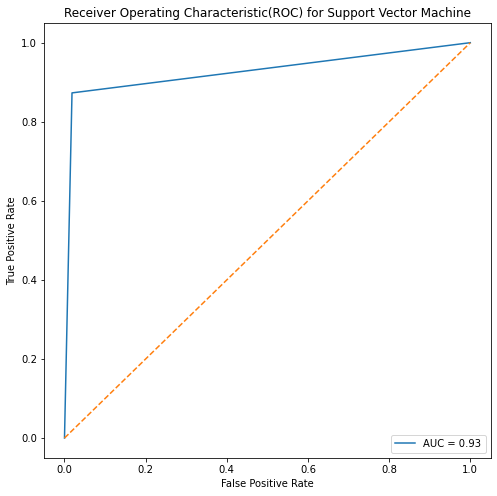

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
#KNN is more sensititve to noise
transformer = RobustScaler().fit(X)
X_scaled=transformer.transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)
#scaling didn't help*****************************
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9221105527638191
0.9590643274853801
Training ROC_AUC:  0.9067545349181962
Test ROC_AUC:  0.9477513227513227


### Tuning

In [26]:
param_grid= {'n_neighbors': np.arange(1,40),
            'p':[1,2]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(knn, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

KNeighborsClassifier(n_neighbors=21, p=1)


0.9708566137566137

In [27]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
40,0.006400,0.001993,0.007552,0.001554,21,1,"{'n_neighbors': 21, 'p': 1}",0.978667,0.996000,0.992000,...,0.965333,0.977333,0.980000,0.993333,0.996000,0.868571,0.972222,0.970857,0.030315,1
38,0.005733,0.001948,0.006851,0.001650,20,1,"{'n_neighbors': 20, 'p': 1}",0.978667,0.993333,0.989333,...,0.941333,0.976000,0.985333,0.997333,0.997333,0.868571,0.972222,0.970729,0.030571,2
36,0.004643,0.000741,0.006028,0.001049,19,1,"{'n_neighbors': 19, 'p': 1}",0.978667,0.994667,0.993333,...,0.941333,0.977333,0.986667,0.992000,0.997333,0.874286,0.972222,0.970589,0.030254,3
42,0.007334,0.001326,0.009901,0.001326,22,1,"{'n_neighbors': 22, 'p': 1}",0.978667,0.996000,0.992000,...,0.961333,0.974667,0.977333,0.993333,0.994667,0.868571,0.972222,0.970053,0.030255,4
46,0.005333,0.000977,0.006735,0.000998,24,1,"{'n_neighbors': 24, 'p': 1}",0.974667,0.997333,0.993333,...,0.958667,0.973333,0.976000,0.993333,0.994667,0.862857,0.986111,0.969385,0.031476,5
44,0.005734,0.000928,0.007671,0.001139,23,1,"{'n_neighbors': 23, 'p': 1}",0.974667,0.994667,0.990667,...,0.960000,0.973333,0.977333,0.990667,0.994667,0.868571,0.972222,0.969299,0.030338,6
48,0.004934,0.001031,0.006334,0.001300,25,1,"{'n_neighbors': 25, 'p': 1}",0.969333,0.997333,0.992000,...,0.958667,0.973333,0.973333,0.994667,0.994667,0.862857,0.986111,0.968854,0.031651,7
50,0.005036,0.000842,0.006131,0.001151,26,1,"{'n_neighbors': 26, 'p': 1}",0.968000,0.998667,0.993333,...,0.958667,0.969333,0.972000,0.994667,0.994667,0.861429,0.986111,0.968135,0.032153,8
56,0.005433,0.001145,0.006935,0.001154,29,1,"{'n_neighbors': 29, 'p': 1}",0.970667,1.000000,0.990667,...,0.952000,0.969333,0.970667,0.993333,0.994667,0.858571,0.986111,0.967857,0.032761,9
32,0.006231,0.001567,0.007285,0.001741,17,1,"{'n_neighbors': 17, 'p': 1}",0.981333,0.994667,0.993333,...,0.941333,0.981333,0.985333,0.989333,0.997333,0.880000,0.972222,0.967585,0.032415,10


In [71]:
knn=KNeighborsClassifier(n_neighbors=21, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))


0.914572864321608
0.9590643274853801
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9477513227513227


In [72]:
knn=KNeighborsClassifier(n_neighbors=17, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.914572864321608
0.9649122807017544
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9523809523809523


Text(0.5, 0, 'False Positive Rate')

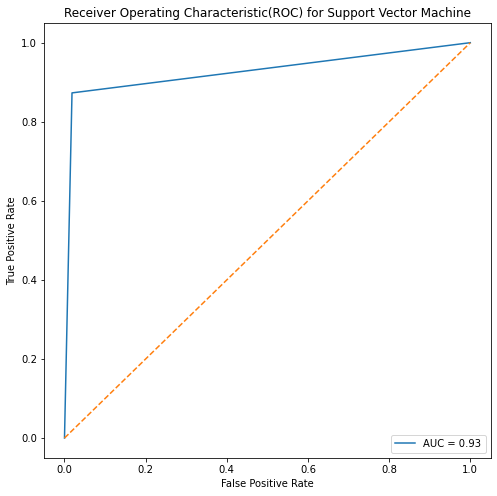

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## SVM

In [31]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8994974874371859
0.8947368421052632
Training ROC_AUC:  0.8752055200668446
Test ROC_AUC:  0.8736772486772486


In [226]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Tuning

In [32]:
param_grid= {'kernel' : ['poly', 'rbf', 'sigmoid'],
             'C' : [50, 10, 1.0, 0.1, 0.01],
             'gamma' : ['scale']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SVC(C=50, kernel='poly')


0.957963492063492

In [33]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008299,0.001416,0.003968,0.000750,50,scale,poly,"{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}",0.957333,0.984000,...,0.933333,0.949333,0.954667,0.984000,1.000000,0.840000,1.000000,0.957963,0.037381,1
1,0.005767,0.001021,0.004001,0.000817,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",0.949333,0.976000,...,0.928000,0.933333,0.957333,0.938667,1.000000,0.814286,1.000000,0.948151,0.043592,2
3,0.007336,0.001812,0.005532,0.002656,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.933333,0.984000,...,0.920000,0.922667,0.954667,0.970667,1.000000,0.805714,1.000000,0.947673,0.044190,3
7,0.008504,0.001433,0.006564,0.001447,1,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.944000,0.960000,...,0.922667,0.925333,0.949333,0.954667,0.997333,0.805714,0.994444,0.944725,0.044909,4
4,0.007353,0.001854,0.005470,0.001676,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.946667,0.973333,...,0.925333,0.930667,0.954667,0.917333,1.000000,0.808571,1.000000,0.944499,0.044195,5
6,0.010468,0.002566,0.008200,0.002688,1,scale,poly,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}",0.930667,0.976000,...,0.922667,0.920000,0.946667,0.960000,0.997333,0.794286,0.991667,0.944417,0.046193,6
9,0.005070,0.000854,0.003897,0.000694,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.938667,0.954667,...,0.920000,0.922667,0.949333,0.946667,0.997333,0.800000,0.991667,0.943002,0.045270,7
10,0.006540,0.001452,0.003935,0.000815,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.954667,0.922667,...,0.922667,0.922667,0.952000,0.941333,0.994667,0.802857,0.994444,0.938883,0.046105,8
13,0.007033,0.001015,0.003903,0.000700,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.952000,0.917333,...,0.917333,0.917333,0.952000,0.933333,0.989333,0.802857,0.991667,0.936304,0.046597,9
12,0.005565,0.000955,0.003968,0.000752,0.01,scale,poly,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}",0.960000,0.898667,...,0.912000,0.920000,0.949333,0.920000,0.981333,0.805714,0.988889,0.929140,0.046725,10


##### Tuned Model

In [34]:
clf = SVC(C=50, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9095477386934674
0.9181286549707602
Training ROC_AUC:  0.8926713565672084
Test ROC_AUC:  0.9087301587301587


In [35]:
clf = SVC(C=10, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.907035175879397
0.9122807017543859
Training ROC_AUC:  0.8893156518692218
Test ROC_AUC:  0.9007936507936508


## Decision trees

In [37]:
# Decision trees
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.935672514619883
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9325396825396824


### Tuning

In [38]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 8, 'max_features': 0.6, 'max_leaf_nodes': 50, 'min_samples_leaf': 10}


0.9480383597883599

In [39]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
495,0.010101,0.002867,0.012185,0.007252,8,0.6,50,10,"{'max_depth': 8, 'max_features': 0.6, 'max_lea...",0.940000,...,0.950667,0.985333,0.888000,0.989333,0.988000,0.918571,0.956944,0.948038,0.051034,1
307,0.004134,0.000719,0.003933,0.000771,5,0.8,20,10,"{'max_depth': 5, 'max_features': 0.8, 'max_lea...",0.978667,...,0.949333,0.986667,0.870667,1.000000,0.990667,0.920000,0.955556,0.946416,0.053422,2
239,0.004033,0.000752,0.003968,0.000605,4,0.6,50,10,"{'max_depth': 4, 'max_features': 0.6, 'max_lea...",0.949333,...,0.946667,0.989333,0.848000,0.976000,0.980000,0.901429,0.948611,0.945838,0.044412,3
371,0.006266,0.001314,0.006301,0.001243,6,0.8,20,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",0.992000,...,0.986667,0.993333,0.845333,0.949333,0.977333,0.908571,0.972222,0.945440,0.045168,4
231,0.004200,0.001536,0.004334,0.001274,4,0.6,30,10,"{'max_depth': 4, 'max_features': 0.6, 'max_lea...",0.954667,...,0.906667,0.952000,0.902667,0.922667,1.000000,0.905714,0.970833,0.945399,0.037097,5
383,0.004640,0.000755,0.004394,0.000708,6,0.8,50,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",0.973333,...,0.942667,0.966667,0.890667,0.953333,1.000000,0.922857,0.952778,0.944465,0.036273,6
423,0.004966,0.000875,0.005300,0.000936,7,0.6,30,10,"{'max_depth': 7, 'max_features': 0.6, 'max_lea...",0.965333,...,0.929333,0.966667,0.897333,0.874667,0.969333,0.885714,0.988889,0.944160,0.047134,7
379,0.004767,0.000803,0.004367,0.000875,6,0.8,40,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",0.977333,...,0.962667,0.994667,0.837333,0.948000,0.984000,0.900000,0.983333,0.943293,0.051239,8
435,0.006433,0.001585,0.006107,0.001351,7,0.8,20,10,"{'max_depth': 7, 'max_features': 0.8, 'max_lea...",0.968000,...,0.932000,0.958667,0.870667,0.968000,1.000000,0.908571,0.936111,0.942739,0.050945,9
283,0.004239,0.001077,0.004294,0.000811,5,0.4,40,10,"{'max_depth': 5, 'max_features': 0.4, 'max_lea...",0.936000,...,0.893333,0.982667,0.866667,0.936000,1.000000,0.867143,0.966667,0.942566,0.038810,10


##### Tuned Model

In [40]:
clf=tree.DecisionTreeClassifier(max_depth= 8, max_features= 0.6, max_leaf_nodes= 50, min_samples_leaf= 10)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9396984924623115
0.9415204678362573
Training ROC_AUC:  0.9437211934988274
Test ROC_AUC:  0.9437830687830688


## Random Forest

In [66]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9707602339181286
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9636243386243386


### Tuning

In [57]:
param_grid = {'max_depth':np.arange(4, 10),
              'max_features':[0.2,0.4,0.6,0.8],
              'n_estimators': [10,50,100,200,300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf_rf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

RandomForestClassifier(max_depth=7, max_features=0.2, random_state=42)


0.9789534391534392

In [58]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
86,0.264842,0.023960,0.018164,0.002267,7,0.2,100,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",1.000000,0.989333,...,0.973333,0.992,0.952000,0.992,1.0,0.928571,0.977778,0.978953,0.026032,1
87,0.678686,0.173021,0.043558,0.011445,7,0.2,200,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",1.000000,0.989333,...,0.970667,0.992,0.952000,0.992,1.0,0.931429,0.977778,0.978703,0.026728,2
142,0.242961,0.013985,0.017465,0.002154,9,0.2,100,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",1.000000,0.997333,...,0.978667,0.992,0.946667,0.992,1.0,0.927143,0.972222,0.978542,0.026755,3
89,1.478288,0.373212,0.089621,0.031999,7,0.2,500,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",1.000000,0.992000,...,0.973333,0.992,0.946667,0.992,1.0,0.925714,0.980556,0.978424,0.027579,4
141,0.122391,0.010100,0.010358,0.001286,9,0.2,50,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",0.997333,0.997333,...,0.978667,0.992,0.946667,0.984,1.0,0.932857,0.972222,0.978219,0.026503,5
88,0.957182,0.255230,0.056999,0.017803,7,0.2,300,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",1.000000,0.989333,...,0.968000,0.992,0.944000,0.992,1.0,0.928571,0.980556,0.978160,0.027383,6
143,0.497714,0.029309,0.030782,0.003599,9,0.2,200,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",1.000000,0.994667,...,0.976000,0.992,0.952000,0.992,1.0,0.925714,0.977778,0.978060,0.027872,7
114,0.243028,0.012806,0.017432,0.002166,8,0.2,100,"{'max_depth': 8, 'max_features': 0.2, 'n_estim...",0.997333,0.994667,...,0.978667,0.992,0.946667,0.992,1.0,0.934286,0.972222,0.977901,0.027199,8
90,3.127757,0.776537,0.174560,0.056701,7,0.2,1000,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",0.997333,0.989333,...,0.973333,0.992,0.949333,0.992,1.0,0.922857,0.980556,0.977809,0.028883,9
146,2.818606,0.601067,0.166420,0.051254,9,0.2,1000,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",0.997333,0.992000,...,0.973333,0.992,0.946667,0.992,1.0,0.922857,0.980556,0.977716,0.028750,10


##### Tuned Model

In [65]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=7, max_features=0.2, n_estimators=100,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.992462311557789
0.9649122807017544
Training ROC_AUC:  0.9899328859060403
Test ROC_AUC:  0.9556878306878306


In [64]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=9, max_features=0.2, n_estimators=100,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9766081871345029
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9715608465608465


## Stochastic Gradient D

In [43]:
#SGD
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5000, random_state=random)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8793969849246231
0.8888888888888888
Training ROC_AUC:  0.8443168647745344
Test ROC_AUC:  0.8591269841269841


In [46]:
param_grid = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty' : ['l2', 'l1', 'elasticnet'],
              'random_state':[random]
              }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SGDClassifier(loss='squared_hinge', max_iter=5000, penalty='l1',
              random_state=42)


0.949416931216931

In [47]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_penalty,param_random_state,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
10,0.006999,0.001154,0.004210,0.000712,squared_hinge,l1,42,"{'loss': 'squared_hinge', 'penalty': 'l1', 'ra...",0.965333,0.989333,...,0.941333,0.952000,0.941333,0.946667,0.994667,0.820000,0.986111,0.949417,0.040846,1
7,0.006394,0.001109,0.004034,0.000605,modified_huber,l1,42,"{'loss': 'modified_huber', 'penalty': 'l1', 'r...",0.976000,0.989333,...,0.941333,0.938667,0.949333,0.944000,0.997333,0.805714,0.983333,0.948754,0.043653,2
1,0.006733,0.001878,0.004272,0.001070,hinge,l1,42,"{'loss': 'hinge', 'penalty': 'l1', 'random_sta...",0.976000,0.973333,...,0.933333,0.954667,0.925333,0.957333,0.997333,0.817143,0.986111,0.947497,0.040614,3
4,0.007645,0.001531,0.004230,0.000851,log,l1,42,"{'loss': 'log', 'penalty': 'l1', 'random_state...",0.941333,0.957333,...,0.936000,0.952000,0.952000,0.944000,0.997333,0.817143,0.986111,0.946990,0.041231,4
13,0.006233,0.001087,0.003868,0.000617,perceptron,l1,42,"{'loss': 'perceptron', 'penalty': 'l1', 'rando...",0.960000,0.965333,...,0.928000,0.952000,0.933333,0.954667,1.000000,0.800000,0.986111,0.944306,0.042753,5
8,0.006907,0.001108,0.004601,0.001645,modified_huber,elasticnet,42,"{'loss': 'modified_huber', 'penalty': 'elastic...",0.928000,0.970667,...,0.922667,0.930667,0.952000,0.944000,0.997333,0.794286,0.991667,0.943469,0.044842,6
11,0.006631,0.001109,0.004103,0.000789,squared_hinge,elasticnet,42,"{'loss': 'squared_hinge', 'penalty': 'elasticn...",0.949333,0.981333,...,0.933333,0.922667,0.944000,0.954667,0.997333,0.791429,0.983333,0.940841,0.045711,7
5,0.008898,0.001248,0.004809,0.000752,log,elasticnet,42,"{'loss': 'log', 'penalty': 'elasticnet', 'rand...",0.944000,0.933333,...,0.930667,0.925333,0.946667,0.944000,0.997333,0.791429,0.983333,0.940482,0.044106,8
14,0.006533,0.001057,0.004135,0.000670,perceptron,elasticnet,42,"{'loss': 'perceptron', 'penalty': 'elasticnet'...",0.949333,0.949333,...,0.917333,0.914667,0.925333,0.946667,0.997333,0.774286,0.988889,0.940351,0.049056,9
6,0.005804,0.001142,0.003797,0.000753,modified_huber,l2,42,"{'loss': 'modified_huber', 'penalty': 'l2', 'r...",0.960000,0.981333,...,0.930667,0.922667,0.944000,0.946667,1.000000,0.762857,0.980556,0.939564,0.047883,10


##### Tuned Model

In [49]:
clf = SGDClassifier(loss='squared_hinge', max_iter=5000, penalty='l1', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8869346733668342
0.9005847953216374
Training ROC_AUC:  0.8557316514379666
Test ROC_AUC:  0.875


In [50]:
clf = SGDClassifier(loss='modified_huber', max_iter=100, penalty='l2', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.864321608040201
0.8947368421052632
Training ROC_AUC:  0.8228349640171424
Test ROC_AUC:  0.8571428571428572


## Stochastic Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9623015873015873


### Tuning

In [52]:
param_grid = {'n_estimators' : [10, 100, 1000],
              'learning_rate' : [0.001, 0.01, 0.1],
              'subsample' : [0.5, 0.7, 1.0],
              'max_depth' : [3, 7, 9]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GradientBoostingClassifier(n_estimators=1000, subsample=0.5)


0.9798645502645502

In [53]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
60,133.183096,706.746639,0.008808,0.008855,0.1,3,1000,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.000000,...,0.965333,0.992000,0.954667,1.000000,1.0,0.954286,0.980556,0.979865,0.024701,1
34,1.949170,0.147945,0.006819,0.000898,0.01,3,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.994667,...,0.978667,0.994667,0.957333,0.994667,1.0,0.940000,0.983333,0.979826,0.025201,2
33,1.869426,0.126316,0.007368,0.001015,0.01,3,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.997333,...,0.976000,0.997333,0.941333,0.997333,1.0,0.948571,0.980556,0.979480,0.026527,3
57,0.138724,0.013568,0.004066,0.000767,0.1,3,100,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.000000,...,0.973333,0.989333,0.957333,0.994667,1.0,0.937143,0.977778,0.979371,0.025054,4
61,2.227075,0.292516,0.009199,0.005283,0.1,3,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.000000,...,0.968000,0.994667,0.949333,1.000000,1.0,0.954286,0.980556,0.979260,0.024677,5
58,0.158521,0.012271,0.004191,0.000720,0.1,3,100,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.994667,...,0.978667,0.994667,0.946667,0.992000,1.0,0.925714,0.983333,0.978654,0.027222,6
67,1.955134,6.250025,0.010487,0.008124,0.1,7,100,0.7,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1.000000,...,0.973333,0.997333,0.941333,0.989333,1.0,0.940000,0.977778,0.977344,0.029084,7
70,5.160169,1.873441,0.010571,0.003593,0.1,7,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1.000000,...,0.960000,0.994667,0.938667,0.992000,1.0,0.934286,0.977778,0.976901,0.027686,8
59,0.160526,0.016345,0.003950,0.000733,0.1,3,100,1,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.994667,...,0.978667,0.994667,0.938667,0.994667,1.0,0.934286,0.980556,0.976515,0.025797,9
43,4.356536,0.161861,0.008068,0.001181,0.01,7,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.997333,...,0.976000,0.997333,0.936000,0.989333,1.0,0.931429,0.983333,0.976512,0.030170,10


##### Tuned Model

In [54]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, subsample=0.5, max_depth=3)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9590643274853801
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9543650793650793


In [55]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, subsample=0.7, max_depth=3)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9766081871345029
Training ROC_AUC:  1.0
Test ROC_AUC:  0.974867724867725
